# Circuit Complexity

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.colors as mcolors
from random import shuffle
import pandas as pd
%matplotlib inline

In [126]:
COLORS = list(mcolors.TABLEAU_COLORS)
shuffle(COLORS)

In [127]:
ROOT = '/Users/jonathanlu/Documents/data_sym/CC'
STATES = ['GHZ', 'XY', 'Cluster']
NUM_DEPTHS = 4
NRUN = 100

losses = np.zeros((len(STATES), NUM_DEPTHS, NRUN))

for i, STATE in enumerate(STATES):
    losses[i] = np.load(f'{ROOT}/{STATE}/losses.npy')[:NUM_DEPTHS]

losses = (losses >= 0) * losses
losses += 1e-20
    
# bottom = round(NRUN * 0.95) # filter bad runs
# losses = np.sort(losses, axis=-1)[:,:bottom]

In [135]:
x = np.arange(NUM_DEPTHS)
avgs = np.mean(losses, axis=-1)
stdevs = np.std(losses, axis=-1)

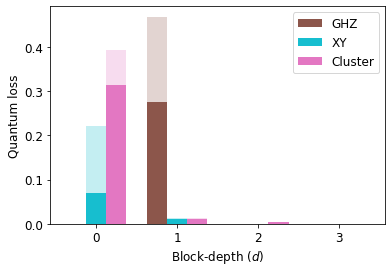

In [158]:
# Plot the data as a bar, 
fig, ax = plt.subplots()
plt.rc('font', size=12)

for i, STATE in enumerate(STATES):
    x_here = x + 0.25*i - 0.25
    ax.bar(x_here, avgs[i], width=0.25, 
           label=STATE, color=COLORS[i])
    ax.bar(x_here, stdevs[i], width=0.25, 
           color=COLORS[i], alpha=0.25)

plt.xlabel(r"Block-depth ($d$)")
plt.ylabel(r'Quantum loss')
plt.xticks(np.arange(NUM_DEPTHS))
plt.legend()